## Author: Alexandru Paul Tabacaru  ;  alextabac@gmail.com
## MIT License

In [161]:
import pandas as pd
import numpy as np
from math import floor
import scipy.stats as stats
import os
import json
import random
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from datetime import datetime
from collections import deque
from MASS_V4 import MASS_V4
from DAMP_V2 import DAMP_V2
from datetime import datetime
import matplotlib.pyplot as plt
from importlib import reload
from data_prep import Data_Preprocess as dprep

## Paths and Data Files

In [3]:
os.getcwd()

'C:\\ALEX\\BGU\\TDA\\PROJECT\\TSAD_project'

In [4]:
data_path = "..\\..\\sensors_data"
data_folder = os.path.join(os.getcwd(), data_path)
files1 = os.listdir(data_folder)
files2 = [os.path.join(data_folder, f) for f in files1 if f.endswith("_trim.tab")]
files = [f for f in files2 if os.path.isfile(f)]
delimiter = "\t"

## Equipment digits explained:
### first digit is the server NOD number:  1, 2, 3, or 4 otherwise
### second digit is the SITE within the NOD: 0, 1, 2.
### third digit is the entity number: 0 to 6 at most
### fourth digit is the side of the entity:  0 or 1

In [170]:
import data_prep
reload(data_prep)
from data_prep import Data_Preprocess as dprep

In [187]:
data_obj = dprep('s', 10)
data_obj.load_data(files[0], delimiter)

File loaded with 11568827 rows.


In [188]:
len(data_obj.df)

23074440

In [198]:
qqq = data_obj.df[:100]
vvv=np.mean(qqq)
print(vvv.value)

0.27474506021788303


In [200]:
qqq.columns
qqq = qqq.rename(columns={'value': 'norm'})

In [204]:
qqq.groupby(['time', 'RUN_START_WW', 'Equip', 'series'], as_index=False)['norm']. \
                    agg(['mean']).reset_index().fillna(0)

,time,RUN_START_WW,Equip,series,mean
0,2022-06-26 23:46:00,202227,Equip2050,Feature2_mean,0.350853
1,2022-06-26 23:46:00,202227,Equip2050,Feature5_mean,1.324299
2,2022-06-26 23:46:00,202227,Equip2050,Feature6_mean,-1.556642
3,2022-06-26 23:46:00,202227,Equip2050,Feature7_mean,-0.301939
4,2022-06-26 23:46:00,202227,Equip2050,Feature8_mean,1.578836
...,...,...,...,...,...
95,2022-06-26 23:49:50,202227,Equip2060,Feature2_mean,-1.713877
96,2022-06-26 23:49:50,202227,Equip2060,Feature5_mean,0.410592
97,2022-06-26 23:49:50,202227,Equip2060,Feature6_mean,0.350794
98,2022-06-26 23:49:50,202227,Equip2060,Feature7_mean,0.156018


In [203]:
qqq.columns

Index(['time', 'RUN_START_WW', 'Equip', 'norm', 'series'], dtype='object')

In [191]:
data_obj.df.head(30)

,time,RUN_START_WW,Equip,value,series
0,2022-06-26 23:46:00,202227,Equip2050,0.350853,Feature2_mean
1,2022-06-26 23:46:00,202227,Equip2050,1.324299,Feature5_mean
2,2022-06-26 23:46:00,202227,Equip2050,-1.556642,Feature6_mean
3,2022-06-26 23:46:00,202227,Equip2050,-0.301939,Feature7_mean
4,2022-06-26 23:46:00,202227,Equip2050,1.578836,Feature8_mean
5,2022-06-26 23:46:10,202227,Equip2051,-0.786874,Feature2_mean
6,2022-06-26 23:46:10,202227,Equip2051,-1.581052,Feature5_mean
7,2022-06-26 23:46:10,202227,Equip2051,1.263169,Feature6_mean
8,2022-06-26 23:46:10,202227,Equip2051,-1.700844,Feature7_mean
9,2022-06-26 23:46:10,202227,Equip2051,0.663677,Feature8_mean


In [174]:
data_obj.prepare_series()

Preparing key series Equip2050_Feature2_mean ...
Preparing key series Equip2050_Feature5_mean ...
Preparing key series Equip2050_Feature6_mean ...
Preparing key series Equip2050_Feature7_mean ...
Found two clusters or more and need split, in dataset Equip2050_Feature7_mean, indx 67153, delta 3.641370641110566.
Found two clusters or more and need split, in dataset Equip2050_Feature7_mean, indx 51779, delta 3.018590471586243.
Found two clusters or more and need split, in dataset Equip2050_Feature7_mean, indx 44582, delta 2.910363246091972.
Found two clusters or more and need split, in dataset Equip2050_Feature7_mean, indx 10157, delta 2.673230810888677.
Found two clusters or more and need split, in dataset Equip2050_Feature7_mean, indx 5294, delta 2.3283189614915343.
Found two clusters or more and need split, in dataset Equip2050_Feature7_mean, indx 2162, delta 1.8238123761305827.
Found two clusters or more and need split, in dataset Equip2050_Feature7_mean, indx 20, delta 2.060813563376

Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 77, delta 3.306277312596257.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 507, delta 3.249161304982743.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 292, delta 2.609861608021914.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 21, delta 2.5801546299787423.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 20, delta 2.1492894952505837.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 167, delta 1.9758539660329266.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 486, delta 2.725936312890166.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 20, delta 2.3670761424277647.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 1355

Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 20, delta 3.1968240553832037.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 258, delta 2.664269624230464.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 569, delta 2.6101755850992836.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 76, delta 2.426905759726809.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 548, delta 2.3652875530374975.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 234, delta 2.230110032292058.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 1787, delta 3.924133009997385.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 1028, delta 3.477349553210934.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 1

Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 4935, delta 3.5107876279259242.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 21, delta 2.807324612745712.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 1433, delta 3.336516745982599.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 244, delta 3.2820234111345954.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 2380, delta 3.19004958034253.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 498, delta 2.4706369929476177.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 105, delta 2.4680697983006117.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 84, delta 2.008632548283715.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 

Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 1581, delta 2.011259511809837.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 11347, delta 1.9591569824573.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 2712, delta 1.9519739228449513.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 42, delta 1.8787007786056527.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 4089, delta 1.8736996749771004.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 3432, delta 1.818022483528227.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 1047, delta 1.8191658007558267.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, indx 208, delta 1.8068351476553381.
Found two clusters or more and need split, in dataset Equip2050_Feature8_mean, 

Found two clusters or more and need split, in dataset Equip2051_Feature7_mean, indx 49847, delta 2.91287912294256.
Found two clusters or more and need split, in dataset Equip2051_Feature7_mean, indx 3300, delta 2.8419049593648937.
Found two clusters or more and need split, in dataset Equip2051_Feature7_mean, indx 24, delta 2.489964971132194.
Found two clusters or more and need split, in dataset Equip2051_Feature7_mean, indx 4954, delta 2.253083120253731.
Found two clusters or more and need split, in dataset Equip2051_Feature7_mean, indx 4678, delta 2.0775194278561346.
Found two clusters or more and need split, in dataset Equip2051_Feature7_mean, indx 1885, delta 2.368424258819217.
Found two clusters or more and need split, in dataset Equip2051_Feature7_mean, indx 1861, delta 2.247170553355071.
Found two clusters or more and need split, in dataset Equip2051_Feature7_mean, indx 11676, delta 2.8896616052448625.
Found two clusters or more and need split, in dataset Equip2051_Feature7_mean,

Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 48, delta 3.062953600149743.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 20, delta 2.797427417739197.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 398, delta 2.526852409369193.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 251, delta 2.0846203300200523.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 20, delta 2.5287203854472873.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 757, delta 3.0897247340349985.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 29, delta 3.064308370572528.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 2098, delta 2.973669620832881.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 21, 

Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 2850, delta 4.1010115454045.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 768, delta 3.782167772168206.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 589, delta 3.661227458944578.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 78, delta 3.1579624837554405.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 77, delta 2.8163796111595243.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 57, delta 2.3033548031376476.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 563, delta 3.496979718061691.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 488, delta 2.759739878378911.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 467, 

Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 273, delta 3.3685381928567315.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 36, delta 3.1033895737552455.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 252, delta 3.1711401412512874.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 58, delta 2.805933446035835.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 37, delta 2.566417861440725.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 31, delta 1.945000452991696.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 1422, delta 3.2389351267906625.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 1012, delta 3.049400224856122.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 38

Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 16547, delta 2.430751150016167.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 16526, delta 1.8120202586900453.
Found two clusters or more and need split, in dataset Equip2051_Feature8_mean, indx 1772, delta 1.8115934972164482.
Preparing key series Equip2001_Feature2_mean ...
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 118748, delta 2.307504876719424.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 22855, delta 2.1494916260328645.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 18894, delta 2.060809794762662.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 6060, delta 2.053192950359088.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 1633, delta 1.9760633331009747.
Found two clusters or

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 159, delta 1.8035780780476225.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 179, delta 1.8989699865304976.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 549, delta 1.8720208656168946.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 1226, delta 1.8296204317703233.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 362, delta 1.8257757388809.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 208, delta 1.8218947753038393.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 47, delta 1.8180500824144157.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 40, delta 1.818031947070597.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 9

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 228, delta 1.8035599427038043.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 953, delta 1.868176172727471.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 240, delta 1.860450516260987.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 879, delta 1.8412270518138683.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 20, delta 1.9336810345982212.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 215, delta 1.929836341708798.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 1130, delta 1.922165091273769.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 142, delta 1.8758836938501369.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 2520, delta 1.8643314798380475.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 1604, delta 1.8103425612917499.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 779, delta 1.8031246944521717.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 75, delta 1.9992221671566086.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 1439, delta 2.060864200794117.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 38668, delta 2.0570195079046933.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 259, delta 2.0189171505429964.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 24, delta 2.003066860046032.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, 

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 2147, delta 1.8257757388809.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 373, delta 1.8108140802310195.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 20, delta 1.806896845966322.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 856, delta 1.8064978684023263.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 216, delta 1.8026169048252658.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 171, delta 1.865256382372768.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 725, delta 1.8141872541811734.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 1399, delta 2.0184637669475456.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 613, delta 2.057019507904693.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 9413, delta 2.0415681949717244.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 7675, delta 2.0377416374261195.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 6634, delta 2.037723502082301.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 140, delta 2.022326595180788.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 75, delta 1.9606482908556426.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 924, delta 1.8874359078622265.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 262, delta 1.8334469893159286.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, in

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 212, delta 1.8643314798380475.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 26, delta 1.8141691188373552.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 728, delta 1.9336810345982212.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 389, delta 1.8372916822053522.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 703, delta 1.89128060075165.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 76, delta 1.8064797330585076.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 37, delta 2.0146009387143033.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 1345, delta 1.9952686622042748.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 92, delta 1.8989699865304979.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 383, delta 1.980361409585849.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 269, delta 1.8450536093594736.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 1431, delta 1.9876155471130637.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 144, delta 1.976099603788611.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 2281, delta 1.9374894568000085.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 2097, delta 1.9297638003335238.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 630, delta 1.9221106852423135.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, i

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 222, delta 2.003012454014577.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 388, delta 1.9529226343891581.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 367, delta 1.9491142121873715.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 193, delta 1.9722549108991871.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 138, delta 1.9336810345982216.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 100, delta 1.829602296426505.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 21, delta 2.0531204089838138.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 813, delta 2.0492757160943906.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 88, delta 1.9148384123712803.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 702, delta 1.887363366486953.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 491, delta 1.8565876880277448.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 6401, delta 2.0415681949717244.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 4292, delta 2.022326595180788.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 884, delta 2.010774381168698.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 984, delta 1.9567673272785822.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, indx 187, delta 1.9452151132664925.
Found two clusters or more and need split, in dataset Equip2001_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2001_Feature7_mean, indx 37210, delta 2.954647905129382.
Found two clusters or more and need split, in dataset Equip2001_Feature7_mean, indx 26822, delta 2.3638175306349476.
Found two clusters or more and need split, in dataset Equip2001_Feature7_mean, indx 21, delta 2.260312780676553.
Found two clusters or more and need split, in dataset Equip2001_Feature7_mean, indx 1894, delta 2.1741884465709305.
Found two clusters or more and need split, in dataset Equip2001_Feature7_mean, indx 2794, delta 1.8483630878140807.
Found two clusters or more and need split, in dataset Equip2001_Feature7_mean, indx 1868, delta 1.8570837056277592.
Found two clusters or more and need split, in dataset Equip2001_Feature7_mean, indx 20, delta 2.3484129071961797.
Found two clusters or more and need split, in dataset Equip2001_Feature7_mean, indx 17759, delta 2.798436821917936.
Found two clusters or more and need split, in dataset Equip2001_Feature7_mea

Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 1393, delta 1.9307213715604812.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 755, delta 1.8635199860033185.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 201, delta 1.8020965319867916.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 961, delta 1.9154522180646398.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 81, delta 1.8663637626962535.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 692, delta 1.8877176453401456.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 2381, delta 2.078009900364228.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 583, delta 2.0350405937823637.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, i

Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 3003, delta 1.972341417859817.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 637, delta 1.8400624006921769.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 599, delta 1.8088248641244042.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 1278, delta 1.8990023607825393.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 1233, delta 1.8760774047232034.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 870, delta 1.813689564212705.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 602, delta 1.8298580434759817.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 3358, delta 1.9602084349757396.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean,

Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 5455, delta 1.9638581890598916.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 4691, delta 1.938926032386823.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 251, delta 1.9277843432647588.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 2075, delta 1.8939648758061427.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 1765, delta 1.8499423107265778.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 575, delta 1.8332411053915045.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 593, delta 1.8146139327094422.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mean, indx 1140, delta 1.9728116340618862.
Found two clusters or more and need split, in dataset Equip2001_Feature8_mea

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 384, delta 1.9603597885682702.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 202, delta 1.8872964974715847.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 543, delta 1.9505640045805093.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 124, delta 1.8486289290988436.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 334, delta 1.8978042557341475.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 2091, delta 2.210827428275387.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 550, delta 2.1064127182504526.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 404, delta 2.0855936084218283.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, i

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 275, delta 1.8018350336585642.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 234, delta 2.028267403881924.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 1511, delta 2.0230135247506436.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 35, delta 1.929131123825334.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 844, delta 1.9968914341166126.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 98, delta 1.8925749274399284.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 126, delta 1.8045356257353893.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 350, delta 1.8038727531347125.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 2597, delta 2.06988107270211.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 353, delta 2.0647253969190795.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 227, delta 1.9870710992917895.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 50, delta 1.9760232226138634.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 26, delta 1.9604579919165201.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 239, delta 1.9447209053597394.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 149, delta 1.9499502336539578.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 1134, delta 1.9342867996083646.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 371, delta 2.085618159258891.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 1940, delta 2.0386769587962363.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 337, delta 1.9134676897797402.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 441, delta 1.8143559605602126.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 118, delta 1.8738917404357032.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 75, delta 2.0334230796649555.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 1010, delta 2.13319768148516.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 2960, delta 2.1227144740596597.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, in

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 75, delta 2.0751104009963286.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 675, delta 1.9603352377312075.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 661, delta 1.9051695068527645.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 26, delta 1.8149451806497017.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 25, delta 1.8456582778143367.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 450, delta 1.9446472528485517.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 200, delta 1.8492918016995201.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 37, delta 1.8195607380173686.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 61, delta 1.9551795619481762.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 381, delta 1.9342622487713022.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 25, delta 1.9296712422406974.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 24, delta 1.8404043986830554.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 139, delta 1.8351014178776492.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 174, delta 1.9499256828168956.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 324, delta 1.9238772446940526.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 26, delta 1.8925258257658033.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 167, delta 1.991662105822394.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 4993, delta 2.0960031633361407.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 596, delta 2.0595451702989855.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 75, delta 1.934925121371979.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 39, delta 1.8977797048970841.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 300, delta 1.9134185881056154.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 213, delta 2.0959786124990782.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 926, delta 2.085642710095954.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 1158, delta 2.028169200533674.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 102, delta 1.992938749349622.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 1031, delta 1.96035978856827.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 631, delta 1.9551550111111142.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 249, delta 1.918697018073959.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 228, delta 1.8069170569304076.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 593, delta 1.8299702929316806.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 3129, delta 2.1795251110212632.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 311, delta 2.038701509633299.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 217, delta 2.0021207624108315.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 25, delta 2.033496732176143.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 152, delta 2.0334230796649555.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 25, delta 1.9082383614855218.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 2069, delta 2.0699056235391726.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 55, delta 2.054315842004767.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 329, delta 1.9603597885682702.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 2

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 303, delta 1.8039464056459003.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 125, delta 1.81742481519297.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 1316, delta 1.9760477734509259.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 480, delta 1.8560432818915862.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 989, delta 1.8566570528181374.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 964, delta 1.8404289495201178.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 156, delta 1.803872753134713.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 858, delta 1.986408226691113.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 26, delta 2.049061962873486.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 469, delta 2.012554868162206.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 370, delta 1.9133940372685527.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 93, delta 1.9094904541756872.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 160, delta 1.8612480593487422.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 37, delta 1.8925749274399286.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 20, delta 1.851378622849794.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 445, delta 2.111666597381734.
Found two clusters or more and need split, in dataset Equip2000_Feature2_mean, indx 2654

Found two clusters or more and need split, in dataset Equip2000_Feature7_mean, indx 28571, delta 2.424368022983336.
Found two clusters or more and need split, in dataset Equip2000_Feature7_mean, indx 3116, delta 2.3518490020198852.
Found two clusters or more and need split, in dataset Equip2000_Feature7_mean, indx 21, delta 1.9743877790429047.
Found two clusters or more and need split, in dataset Equip2000_Feature7_mean, indx 21, delta 2.237602848346275.
Found two clusters or more and need split, in dataset Equip2000_Feature7_mean, indx 4389, delta 2.0958769072615153.
Found two clusters or more and need split, in dataset Equip2000_Feature7_mean, indx 19857, delta 1.9060420890575727.
Found two clusters or more and need split, in dataset Equip2000_Feature7_mean, indx 4365, delta 1.9291017777550172.
Found two clusters or more and need split, in dataset Equip2000_Feature7_mean, indx 24, delta 3.2763829796402724.
Found two clusters or more and need split, in dataset Equip2000_Feature7_mean,

Found two clusters or more and need split, in dataset Equip2000_Feature8_mean, indx 22374, delta 2.044004090915597.
Found two clusters or more and need split, in dataset Equip2000_Feature8_mean, indx 753, delta 2.003287598171444.
Found two clusters or more and need split, in dataset Equip2000_Feature8_mean, indx 11816, delta 1.9847510552889207.
Found two clusters or more and need split, in dataset Equip2000_Feature8_mean, indx 6652, delta 1.9352025629188934.
Found two clusters or more and need split, in dataset Equip2000_Feature8_mean, indx 1271, delta 1.8253742606709626.
Found two clusters or more and need split, in dataset Equip2000_Feature8_mean, indx 2581, delta 1.814289452290406.
Found two clusters or more and need split, in dataset Equip2000_Feature8_mean, indx 3146, delta 1.9197451834781876.
Found two clusters or more and need split, in dataset Equip2000_Feature8_mean, indx 2431, delta 1.818127475009744.
Found two clusters or more and need split, in dataset Equip2000_Feature8_me

Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, indx 439, delta 1.8451063812106718.
Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, indx 157, delta 1.8085801254301481.
Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, indx 1720, delta 2.476510454163105.
Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, indx 447, delta 1.8883013309925332.
Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, indx 872, delta 2.419978116378265.
Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, indx 202, delta 1.9465008422776542.
Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, indx 851, delta 2.0093987516091483.
Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, indx 761, delta 1.933921260411377.
Found two clusters or more and need split, in dataset Equip2060_Feature1_mean, ind

Found two clusters or more and need split, in dataset Equip2061_Feature3_mean, indx 596, delta 3.333811470635749.
Found two clusters or more and need split, in dataset Equip2061_Feature3_mean, indx 31, delta 3.2136741203425867.
Found two clusters or more and need split, in dataset Equip2061_Feature3_mean, indx 2297, delta 2.192506642850554.
Found two clusters or more and need split, in dataset Equip2061_Feature3_mean, indx 20, delta 2.023563494000779.
Found two clusters or more and need split, in dataset Equip2061_Feature3_mean, indx 6350, delta 1.9484776500675487.
Found two clusters or more and need split, in dataset Equip2061_Feature3_mean, indx 1206, delta 1.918443312494231.
Preparing key series Equip2061_Feature4_mean ...
Found two clusters or more and need split, in dataset Equip2061_Feature4_mean, indx 10079, delta 2.83343068114835.
Found two clusters or more and need split, in dataset Equip2061_Feature4_mean, indx 9751, delta 2.355861407417024.
Found two clusters or more and nee

Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 888, delta 1.9394660745918082.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 1476, delta 2.1352528154545656.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 3107, delta 2.3985613661072733.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 20, delta 2.0697327384129274.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 5451, delta 2.1456679495691984.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 1174, delta 2.122576975489621.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 22, delta 2.0943893833657454.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 4632, delta 1.8731657458127056.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean,

Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 692, delta 1.85112143994869.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 1224, delta 1.8078165355105944.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 505, delta 2.3325624100127067.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 3103, delta 1.9162604861425183.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 1372, delta 1.805472118655184.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 25008, delta 4.36831575964137.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 4897, delta 4.135885904886998.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, indx 2075, delta 3.5700535015470676.
Found two clusters or more and need split, in dataset Equip2060_Feature8_mean, 

Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 20, delta 2.3534637041173934.
Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 5410, delta 2.186647667563138.
Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 2303, delta 2.130670379934525.
Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 878, delta 2.0120208466887286.
Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 85, delta 1.9320532929336403.
Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 26, delta 1.9115964768567961.
Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 76, delta 1.8613842919407384.
Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 1601, delta 2.076366831803244.
Found two clusters or more and need split, in dataset Equip2030_Feature1_mean, indx 

Preparing key series Equip2031_Feature9_mean ...
Found two clusters or more and need split, in dataset Equip2031_Feature9_mean, indx 3914, delta 2.08333847972594.
Preparing key series Equip2010_Feature0_mean ...
Found two clusters or more and need split, in dataset Equip2010_Feature0_mean, indx 12924, delta 5.72496965967078.
Found two clusters or more and need split, in dataset Equip2010_Feature0_mean, indx 1083, delta 2.3981172580949135.
Found two clusters or more and need split, in dataset Equip2010_Feature0_mean, indx 20, delta 2.3312055042418187.
Found two clusters or more and need split, in dataset Equip2010_Feature0_mean, indx 12901, delta 5.203057979616642.
Preparing key series Equip2010_Feature1_mean ...
Found two clusters or more and need split, in dataset Equip2010_Feature1_mean, indx 4610, delta 3.336095574607668.
Found two clusters or more and need split, in dataset Equip2010_Feature1_mean, indx 159, delta 3.171380726211637.
Found two clusters or more and need split, in dat

Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, indx 12901, delta 3.96833949707022.
Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, indx 23, delta 3.861040961553018.
Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, indx 1084, delta 1.9879258620770672.
Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, indx 3753, delta 2.0433257668257276.
Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, indx 5842, delta 2.0201686066407887.
Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, indx 26, delta 1.911850712876212.
Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, indx 4041, delta 1.999847921578982.
Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, indx 30, delta 1.9881031417722677.
Found two clusters or more and need split, in dataset Equip2010_Feature9_mean, ind

Found two clusters or more and need split, in dataset Equip2011_Feature7_mean, indx 12975, delta 3.3810586237663838.
Found two clusters or more and need split, in dataset Equip2011_Feature7_mean, indx 11642, delta 3.3408332644148553.
Found two clusters or more and need split, in dataset Equip2011_Feature7_mean, indx 5044, delta 1.9876117085723173.
Found two clusters or more and need split, in dataset Equip2011_Feature7_mean, indx 12951, delta 3.1569285842160215.
Found two clusters or more and need split, in dataset Equip2011_Feature7_mean, indx 11113, delta 3.0278508936782695.
Found two clusters or more and need split, in dataset Equip2011_Feature7_mean, indx 37, delta 2.558649089639584.
Found two clusters or more and need split, in dataset Equip2011_Feature7_mean, indx 1267, delta 1.869322026217674.
Found two clusters or more and need split, in dataset Equip2011_Feature7_mean, indx 27, delta 1.8491261324611825.
Found two clusters or more and need split, in dataset Equip2011_Feature7_m

Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 234, delta 1.8242516395637436.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 391, delta 1.905160825103286.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 76, delta 1.8554262636776735.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 239, delta 1.8337654920919366.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 1877, delta 2.3100674592298276.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 191, delta 2.1133438813653407.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 914, delta 1.8260783667917133.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 159, delta 1.824191518076243.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, ind

Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 1087, delta 2.251767369927051.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 1530, delta 2.006750758923334.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 2371, delta 1.9638059542071438.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 509, delta 1.9191983529087704.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 872, delta 1.9150889095583232.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 446, delta 1.9044481396191077.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 843, delta 1.8345193484095377.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 20, delta 1.9374359335885.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx

Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 10519, delta 3.075164373400341.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 5505, delta 2.410343333714388.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 1537, delta 2.03695706649593.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 2037, delta 1.8959840983944565.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 1005, delta 1.842346382530382.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 360, delta 1.8462002256195569.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 1516, delta 1.8019531184866575.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 562, delta 1.9350300384547774.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean,

Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 16124, delta 2.121845624254023.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 8947, delta 1.9705616152953807.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 664, delta 1.9041066407883385.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 5320, delta 1.8966462364779868.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 1157, delta 1.822342854654282.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 5001, delta 1.854350845616822.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 3095, delta 1.829835423057554.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean, indx 176, delta 1.9572989242888603.
Found two clusters or more and need split, in dataset Equip2011_Feature8_mean

Found two clusters or more and need split, in dataset Equip2061_Feature2_mean, indx 2333, delta 1.986107547377058.
Preparing key series Equip2061_Feature5_mean ...
Preparing key series Equip2061_Feature6_mean ...
Found two clusters or more and need split, in dataset Equip2061_Feature6_mean, indx 49510, delta 2.3334322529736906.
Found two clusters or more and need split, in dataset Equip2061_Feature6_mean, indx 57642, delta 1.9138159658839033.
Preparing key series Equip2061_Feature7_mean ...
Found two clusters or more and need split, in dataset Equip2061_Feature7_mean, indx 26202, delta 2.6374605274787197.
Found two clusters or more and need split, in dataset Equip2061_Feature7_mean, indx 65708, delta 2.141735560191002.
Found two clusters or more and need split, in dataset Equip2061_Feature7_mean, indx 25, delta 1.9294828876543977.
Found two clusters or more and need split, in dataset Equip2061_Feature7_mean, indx 8167, delta 2.003877392963471.
Found two clusters or more and need split,

Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 1588, delta 1.969640375331151.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 159, delta 1.8248002898378524.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 1028, delta 1.8210730554566865.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 114, delta 2.0528803837624827.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 1725, delta 1.89362027754499.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 769, delta 1.8607516579086862.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 4609, delta 1.9496144240379676.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 1487, delta 1.93798226677761.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, i

Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 739, delta 1.909107083191392.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 256, delta 1.8305942835847575.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 714, delta 1.8141119791208167.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 6971, delta 3.8969964224491456.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 954, delta 2.523578743956319.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 1401, delta 3.8629826294514213.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 2303, delta 2.884538982375756.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, indx 3246, delta 2.848052704977274.
Found two clusters or more and need split, in dataset Equip2061_Feature8_mean, i

Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, indx 29, delta 2.4390307450757045.
Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, indx 3502, delta 2.155970610764254.
Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, indx 1904, delta 1.9316835329252762.
Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, indx 10405, delta 1.868934717312441.
Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, indx 21, delta 1.868374875854543.
Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, indx 20, delta 1.8170063254856936.
Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, indx 24338, delta 2.5662976614456037.
Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, indx 2725, delta 2.2880938937044597.
Found two clusters or more and need split, in dataset Equip2010_Feature7_mean, 

Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 441, delta 2.228962310897163.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 216, delta 2.0939629869042475.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 258, delta 2.024164226510515.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 701, delta 1.9978026624139167.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 378, delta 1.9539262906219195.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 121, delta 1.8024096317483025.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 220, delta 1.9271941791384148.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 422, delta 1.8931216108526088.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, ind

Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 758, delta 1.8643771640309479.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 1530, delta 1.912922775727946.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 80, delta 1.866256697444145.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 851, delta 1.8044833386191637.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 1773, delta 1.923763338419609.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 95966, delta 3.2955916071988502.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 84886, delta 3.037773148402618.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, indx 386, delta 2.4692007596373484.
Found two clusters or more and need split, in dataset Equip2010_Feature8_mean, 

Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, indx 10989, delta 2.250945202739412.
Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, indx 2564, delta 2.129222535471087.
Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, indx 7970, delta 2.0679651410974462.
Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, indx 434, delta 1.8181828347288305.
Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, indx 7248, delta 2.0349600794735823.
Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, indx 43, delta 1.9010915495276919.
Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, indx 422, delta 1.8224074826166594.
Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, indx 32, delta 1.8004921216985539.
Found two clusters or more and need split, in dataset Equip2050_Feature1_mean, 

Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, indx 410, delta 2.0656228501375513.
Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, indx 690, delta 1.9204868230520211.
Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, indx 669, delta 1.8542226975543583.
Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, indx 274, delta 2.0348364201497553.
Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, indx 105, delta 1.8872081582556035.
Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, indx 955, delta 2.549556209137138.
Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, indx 2449, delta 2.4382852550382497.
Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, indx 566, delta 1.945262569089794.
Found two clusters or more and need split, in dataset Equip2051_Feature1_mean, in

Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, indx 36, delta 2.178952630201639.
Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, indx 407, delta 1.8809992914015004.
Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, indx 971, delta 1.8096493985367743.
Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, indx 1743, delta 2.2501436146189553.
Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, indx 188, delta 2.1629028770183014.
Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, indx 1916, delta 2.1306444622042817.
Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, indx 80, delta 2.085673371601259.
Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, indx 151, delta 2.0257648869465004.
Found two clusters or more and need split, in dataset Equip2000_Feature1_mean, ind

Found two clusters or more and need split, in dataset Equip2001_Feature1_mean, indx 1023, delta 1.9213456960722155.
Found two clusters or more and need split, in dataset Equip2001_Feature1_mean, indx 303, delta 2.036812424513154.
Found two clusters or more and need split, in dataset Equip2001_Feature1_mean, indx 204, delta 1.8009709858853906.
Preparing key series Equip2001_Feature3_mean ...
Found two clusters or more and need split, in dataset Equip2001_Feature3_mean, indx 3200, delta 3.7358201498224246.
Found two clusters or more and need split, in dataset Equip2001_Feature3_mean, indx 34, delta 3.0608184624155514.
Found two clusters or more and need split, in dataset Equip2001_Feature3_mean, indx 9509, delta 2.894601830681738.
Found two clusters or more and need split, in dataset Equip2001_Feature3_mean, indx 2122, delta 2.878385573927226.
Found two clusters or more and need split, in dataset Equip2001_Feature3_mean, indx 421, delta 2.250005624689588.
Found two clusters or more and n

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 39, delta 1.8120221645268846.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 625, delta 1.8228234532685779.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 182, delta 1.8156084636930823.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 300, delta 1.8948800882887156.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 2535, delta 1.88768205521046.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 2619, delta 1.8750918560099772.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 32, delta 1.810648688250468.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 90, delta 1.8048071749513883.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 973, delta 1.8426455985417967.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 156, delta 1.8174312871463512.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 182, delta 1.828215619390805.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 220, delta 1.8426455985417967.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 177, delta 1.824629320224607.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 658, delta 1.8714631656006793.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 26, delta 1.8660709994784526.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 50, delta 1.833641698507512.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 6

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 535, delta 1.907512678732299.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 2939, delta 1.8948546535428559.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 147, delta 1.8426371202931766.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 25, delta 1.889496400415109.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 191, delta 1.8822559760937532.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 1144, delta 1.83721951942509.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 799, delta 1.831818875054243.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 285, delta 1.8248412764401034.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 124, delta 1.8894709656692492.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 631, delta 1.884061843049782.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 24, delta 1.8104112972891118.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 626, delta 1.9075042004836784.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 545, delta 1.9074872439864385.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 476, delta 1.905698333527649.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 31, delta 1.9002892109081828.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 63, delta 1.855252754239519.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 26

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 352, delta 1.9020950778642116.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 327, delta 1.8714462091034396.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 1133, delta 1.957958258020429.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 5657, delta 1.9579497797718093.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 6912, delta 1.9579497797718088.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 6216, delta 1.9291152562156855.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 2709, delta 1.8969063897088607.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 640, delta 1.8646890449534164.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mea

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 286, delta 1.898491822200774.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 107, delta 1.92191722313743.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 427, delta 1.9201028779327807.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 160, delta 1.8680633879041184.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 286, delta 1.884078799547022.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 255, delta 1.8408397315857674.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 38, delta 1.894888566537336.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 4813, delta 1.9453087110796066.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 6

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 14983, delta 1.9759660580889982.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 5985, delta 1.9705569354695314.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 2465, delta 1.9273093892596567.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 1290, delta 1.925520478800868.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 230, delta 1.9147107118105544.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 23, delta 1.8570925341900275.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 208, delta 1.8572620991624245.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 76, delta 1.8516494985760812.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean,

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 374, delta 1.8462403759566146.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 149, delta 1.8408227750885278.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 2128, delta 1.891285310873898.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 25, delta 1.875049464766878.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 360, delta 1.846240375956614.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 75, delta 1.8714631656006793.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 295, delta 1.8876735769618402.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 180, delta 1.8858677100058112.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 1476, delta 1.9237400465906989.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 26, delta 1.9021120343614515.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 866, delta 1.9057152900248897.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 341, delta 1.8786696769275557.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 193, delta 1.8264267089320159.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 264, delta 1.8895133569123492.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 138, delta 1.8390253863811186.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 6219, delta 1.947140012781495.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, i

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 160, delta 2.0084123155571785.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 132, delta 1.8534553655321102.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 11781, delta 2.071414181051312.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 1019, delta 2.0210194712549017.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 59, delta 1.9579582580204287.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 37, delta 1.8930657430840667.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 24, delta 1.9417308901620283.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 426, delta 2.003003192937712.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 56, delta 1.9219087448888101.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 50, delta 1.9183139674739924.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 21, delta 1.8930826995813068.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 44, delta 1.8714716438493.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 90, delta 1.804807174951389.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 86, delta 1.9921679912015389.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 144, delta 1.8822983673368534.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 27, delta 1.8462234194593745.
Found two clusters or more and need split, in dataset Equip2020_Feature2_mean, indx 89, del

Found two clusters or more and need split, in dataset Equip2020_Feature7_mean, indx 20732, delta 1.9479391969241844.
Found two clusters or more and need split, in dataset Equip2020_Feature7_mean, indx 10344, delta 1.8870860277677275.
Found two clusters or more and need split, in dataset Equip2020_Feature7_mean, indx 21, delta 1.8588454684779159.
Found two clusters or more and need split, in dataset Equip2020_Feature7_mean, indx 16158, delta 3.9863247021237194.
Found two clusters or more and need split, in dataset Equip2020_Feature7_mean, indx 20, delta 3.909371499755801.
Found two clusters or more and need split, in dataset Equip2020_Feature7_mean, indx 40106, delta 3.6091614339377673.
Found two clusters or more and need split, in dataset Equip2020_Feature7_mean, indx 25970, delta 3.3719971172813255.
Found two clusters or more and need split, in dataset Equip2020_Feature7_mean, indx 8096, delta 2.189204807227461.
Found two clusters or more and need split, in dataset Equip2020_Feature7_

Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 20, delta 2.5420074694151618.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 325, delta 1.896559978703744.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 312, delta 2.5970509293867026.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 20, delta 1.9807912301516533.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 1394, delta 2.5841796219324022.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 2365, delta 2.546385836394274.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 2013, delta 2.231879790830977.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 1001, delta 2.1662666134129127.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, in

Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 1520, delta 3.4980210721144807.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 507, delta 3.4225815452571164.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 141, delta 2.964672777665561.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 466, delta 2.736301778693992.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 385, delta 2.2413756782321825.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 20, delta 2.003108223984199.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 87, delta 2.6647825121760924.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 20, delta 2.3014329726833336.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 5

Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 20, delta 3.519350038563448.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 18481, delta 3.275305573167512.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 27, delta 2.9068679158540722.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 96, delta 2.8531425138519775.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 20, delta 2.606876040024439.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 1956, delta 2.4168199450214134.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 1225, delta 2.2755884114213045.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 28, delta 2.2673990375222717.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 

Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 889, delta 1.8110189812015098.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 4318, delta 1.8956705182242084.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 1324, delta 1.8892703422728752.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 7908, delta 2.6746997106230674.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 4688, delta 2.4278902112426595.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 740, delta 1.8019617969143562.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 2263, delta 2.108266867166247.
Found two clusters or more and need split, in dataset Equip2020_Feature8_mean, indx 3774, delta 2.4600961354049793.
Found two clusters or more and need split, in dataset Equip2020_Feature8_me

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 459, delta 2.001398693151908.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 20, delta 1.9419613027470763.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 212, delta 1.9112996582054615.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 715, delta 1.895923718741391.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 564, delta 1.8499132050516631.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 106, delta 1.9668930637442754.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 379, delta 1.930465441903634.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 138, delta 1.9151075493168683.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 585, delta 1.9688150561772837.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 120, delta 1.9400393103140674.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 37, delta 1.82885249923644.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 25, delta 1.9668930637442756.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 37, delta 1.98221486257643.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 30025, delta 2.066593037417113.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 64081, delta 2.060854130434045.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 565, delta 2.051244168269.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 3159,

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 32, delta 1.8614451596497166.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 40, delta 1.8364863283365593.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 24, delta 1.9438562248641271.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 852, delta 1.9438562248641267.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 2394, delta 1.9247084880432601.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 1751, delta 1.9227774721715987.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 421, delta 1.8844549282139063.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 385, delta 1.8537752367949865.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, in

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 7717, delta 2.0090595925679846.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 3444, delta 2.003293615268958.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 563, delta 1.9611090395679431.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 241, delta 1.9457782172971358.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 267, delta 1.8691150825044467.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 143, delta 1.9304473950263281.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 45, delta 1.9210991125822106.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 64, delta 1.9285344260319723.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, in

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 284, delta 1.9151255961941738.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 237, delta 1.9132126271998176.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 3794, delta 2.0071646704509343.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 575, delta 1.96687501686697.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 300, delta 1.9400393103140674.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 112, delta 1.9323874343366425.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 25, delta 1.8978547346130519.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 3044, delta 1.9994947475962046.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, in

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 196, delta 2.001380646274602.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 2554, delta 1.9899118557471183.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 667, delta 1.9822329094537352.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 62, delta 1.976484979032014.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 385, delta 1.9726319707273436.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 454, delta 1.9131675100065542.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 360, delta 1.9668930637442754.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 453, delta 1.9457691938584833.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 506, delta 1.892088757314026.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 261, delta 1.8537391430403756.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 68, delta 1.8463489467838774.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 439, delta 1.8480092594959596.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 541, delta 1.9975637317245423.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 166, delta 1.947691186291492.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 314, delta 1.9457872407357888.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 87, delta 1.9400393103140674.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 96, delta 2.005251701456578.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 1151, delta 2.005233654579273.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 700, delta 1.9131765334452069.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 1097, delta 2.0090686160066373.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 570, delta 1.9534391167132128.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 25, delta 1.9150985258782156.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 270, delta 1.869088012188488.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 211, delta 1.8537481664790278.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 380, delta 1.9227955190489041.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 205, delta 1.8556701589120372.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 289, delta 1.9112635644508509.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 578, delta 1.9994676772802458.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 64, delta 1.9764669321547084.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 86, delta 1.9668840403056222.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 39, delta 1.9745359162830467.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 188, delta 1.9956417392915335.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 834, delta 2.0033206855849164.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 849, delta 1.9630400554396048.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 25, delta 1.9592141174508924.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 205, delta 1.8390941021071678.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 111, delta 1.8307293744761854.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 75, delta 1.8134765597723697.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 383, delta 1.9438652483027798.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 151, delta 1.932387434336643.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 1668, delta 2.0033206855849164.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 344, delta 1.9898938088698124.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 1348, delta 1.9438742717414326.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 25, delta 1.8786799274762274.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 105, delta 1.8767759819205239.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 50, delta 1.8674096525991004.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 86, delta 1.9035665712801628.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 163, delta 1.881053091841867.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 2053, delta 1.842252305635586.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 1159, delta 1.838408320769568.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 360, delta 1.8096235514676984.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 987, delta 1.8154346459599888.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 1966, delta 1.890193835196975.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 347, delta 1.8755217239478086.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 161, delta 1.8153895287667252.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 430, delta 1.8652440273224706.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, i

Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 1409, delta 1.9783799011490648.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 225, delta 1.8825148889035925.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 768, delta 1.959223140889545.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 101, delta 1.867156996316827.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 495, delta 1.8479912126186544.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 57, delta 1.834798945308519.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 93, delta 1.8288434757977878.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 565, delta 1.8806199667865413.
Found two clusters or more and need split, in dataset Equip2021_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, indx 3788, delta 1.8690441697479776.
Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, indx 25823, delta 2.503028824191943.
Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, indx 17586, delta 2.3408766258206315.
Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, indx 380, delta 2.009920467332234.
Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, indx 2009, delta 2.0058493117369585.
Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, indx 69, delta 1.959301932206488.
Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, indx 20, delta 2.3232897909082926.
Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, indx 16078, delta 2.24981231147459.
Found two clusters or more and need split, in dataset Equip2021_Feature7_mean, 

Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 121, delta 3.6069483044671293.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 717, delta 3.3258883379022297.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 285, delta 2.949113882805824.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 264, delta 2.1347922755093562.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 65, delta 3.3318677790519486.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 20, delta 2.979901713147837.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 301, delta 3.208159630507909.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 23, delta 3.096402178747221.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 187

Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 20, delta 3.683215849136555.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 1868, delta 3.5788284145768836.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 743, delta 3.45585314807795.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 20, delta 3.1629035674623713.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 1175, delta 3.0181558899245693.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 146, delta 2.132966021115347.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 1847, delta 3.307636438438092.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 406, delta 3.1977395228364816.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 

Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 5022, delta 3.3241787592474616.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 22, delta 3.0126737434001867.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 830, delta 2.455795906721915.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 850, delta 2.374826190245786.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 879, delta 2.1340780464268216.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 77, delta 1.9953827285014316.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 1395, delta 1.9335579451609408.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 364, delta 1.822526513056954.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx

Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 7597, delta 3.2415522543028272.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 17807, delta 3.0627293885151845.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 22, delta 2.510014893645028.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 689, delta 2.339447624896943.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 7116, delta 2.324157554743417.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 9630, delta 1.8813476518176377.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 4072, delta 1.8800740128325275.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 4639, delta 2.2125534428204943.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean

Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 526, delta 1.8548513275915317.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 21, delta 2.9840453298099647.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 10725, delta 2.9658434210418485.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 3527, delta 2.923815197305635.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 20, delta 2.296801459622228.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 409, delta 2.1656273072859222.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 735, delta 2.13075245797773.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx 699, delta 2.0876166869742865.
Found two clusters or more and need split, in dataset Equip2021_Feature8_mean, indx

Found two clusters or more and need split, in dataset Equip2040_Feature1_mean, indx 63, delta 2.0303807185541.
Found two clusters or more and need split, in dataset Equip2040_Feature1_mean, indx 384, delta 2.0140255228925383.
Preparing key series Equip2040_Feature3_mean ...
Found two clusters or more and need split, in dataset Equip2040_Feature3_mean, indx 10890, delta 2.5286407708265086.
Found two clusters or more and need split, in dataset Equip2040_Feature3_mean, indx 2973, delta 1.9317119798882951.
Preparing key series Equip2040_Feature4_mean ...
Found two clusters or more and need split, in dataset Equip2040_Feature4_mean, indx 13863, delta 2.243371376285692.
Found two clusters or more and need split, in dataset Equip2040_Feature4_mean, indx 23, delta 2.234613974348694.
Found two clusters or more and need split, in dataset Equip2040_Feature4_mean, indx 11062, delta 1.824490771081574.
Preparing key series Equip2040_Feature9_mean ...
Found two clusters or more and need split, in dat

Found two clusters or more and need split, in dataset Equip2041_Feature7_mean, indx 3161, delta 1.941145026764403.
Found two clusters or more and need split, in dataset Equip2041_Feature7_mean, indx 2202, delta 2.07669164350897.
Found two clusters or more and need split, in dataset Equip2041_Feature7_mean, indx 13657, delta 2.0302207096075815.
Found two clusters or more and need split, in dataset Equip2041_Feature7_mean, indx 4756, delta 1.9507889336385236.
Found two clusters or more and need split, in dataset Equip2041_Feature7_mean, indx 1851, delta 1.8645144747463758.
Found two clusters or more and need split, in dataset Equip2041_Feature7_mean, indx 189, delta 1.835369853915926.
Found two clusters or more and need split, in dataset Equip2041_Feature7_mean, indx 12645, delta 1.9186308055391053.
Found two clusters or more and need split, in dataset Equip2041_Feature7_mean, indx 2070, delta 2.0014539555014452.
Found two clusters or more and need split, in dataset Equip2041_Feature7_me

Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 259, delta 3.316070469680467.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 20, delta 3.1182195572804945.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 133, delta 1.9011690404851183.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 85, delta 3.2474707098992734.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 4049, delta 3.6189868234528726.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 87, delta 3.389078581060744.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 229, delta 3.333416026342825.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 93, delta 3.052314134585581.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 208

Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 297, delta 3.287595527209353.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 365, delta 3.268535379805642.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 118, delta 2.8536235487058645.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 225, delta 2.617042150799123.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 20, delta 2.238494191616577.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 484, delta 2.9314559155742175.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 518, delta 3.51075990625556.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 20, delta 3.4617452971251232.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 270,

Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 74, delta 1.8172385536216424.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 342, delta 2.828750706808755.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 321, delta 2.358594533055599.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 109475, delta 5.315890934815422.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 2493, delta 4.262990742512711.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 271, delta 3.182028177105901.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 20, delta 2.6431940820444253.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 2296, delta 4.095872877293007.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx

Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 28, delta 2.926930533457852.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 15639, delta 2.728514502321799.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 1587, delta 2.294915852233241.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 34, delta 1.8522925809927169.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 20, delta 2.077763336360787.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 13062, delta 2.051747657052334.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 3515, delta 2.037066177297146.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx 446, delta 1.9855161178243912.
Found two clusters or more and need split, in dataset Equip2041_Feature8_mean, indx

Found two clusters or more and need split, in dataset Equip2040_Feature7_mean, indx 1279, delta 1.8530272876680978.
Found two clusters or more and need split, in dataset Equip2040_Feature7_mean, indx 6691, delta 3.1367634644812767.
Found two clusters or more and need split, in dataset Equip2040_Feature7_mean, indx 2958, delta 2.825117602542679.
Found two clusters or more and need split, in dataset Equip2040_Feature7_mean, indx 124799, delta 2.6042037021760085.
Found two clusters or more and need split, in dataset Equip2040_Feature7_mean, indx 64, delta 2.277342520678471.
Found two clusters or more and need split, in dataset Equip2040_Feature7_mean, indx 790, delta 1.9306442528740158.
Found two clusters or more and need split, in dataset Equip2040_Feature7_mean, indx 127, delta 1.9057485421011708.
Found two clusters or more and need split, in dataset Equip2040_Feature7_mean, indx 123772, delta 2.2253609435174844.
Found two clusters or more and need split, in dataset Equip2040_Feature7_m

Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 20, delta 2.8533954790365628.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 805, delta 2.549765212726039.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 376, delta 2.38231573065456.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 363, delta 1.8278405234743966.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 137, delta 3.1184574753652066.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 21, delta 2.76868307603105.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 44, delta 2.111009203002534.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 20, delta 1.9714005910620913.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 1985, 

Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 23, delta 3.038683640065162.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 602, delta 2.2561254032920326.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 176, delta 1.8502123973882356.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 20, delta 2.8942810159478896.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 161, delta 2.789989648688547.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 20, delta 2.6816077811386934.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 98, delta 3.4729902812968736.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 323, delta 3.459619043274385.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 340

Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 3510, delta 4.101378557757386.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 25, delta 4.095491712374015.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 42, delta 2.744415906743515.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 21, delta 1.9310683273802618.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 3388, delta 3.809858905533786.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 56, delta 2.5708653871590568.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 2398, delta 3.7977946622749212.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 969, delta 3.1289594680089867.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 2

Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 496, delta 1.8759123467282488.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 209, delta 1.8012407713311283.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 288, delta 2.0434167806174046.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 4241, delta 2.2481015775454427.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 3435, delta 1.9000974460210498.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 2444, delta 1.8023569525670506.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 278, delta 2.2069965305799495.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 1301, delta 1.9431980032518095.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mea

Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 4462, delta 2.608400418003682.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 4773, delta 2.558732429263953.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 6132, delta 2.1679404808983773.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 3237, delta 1.8888123760938886.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 2462, delta 1.8885856942463564.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 70, delta 1.8074067593144305.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 640, delta 1.8735367364069093.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, indx 66, delta 1.8013384838553854.
Found two clusters or more and need split, in dataset Equip2040_Feature8_mean, 

Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 564, delta 2.0543720212657774.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 206, delta 1.9231252528498357.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 104, delta 1.8145591299177268.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 133, delta 2.0379258660097257.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 70, delta 2.014439036444711.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 318, delta 2.003071840900088.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 21, delta 1.8673104416295407.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 44, delta 1.8608878417828139.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 6

Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 693, delta 1.9092857594562616.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 472, delta 1.847182712402772.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 362, delta 1.8380459594827419.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 161, delta 2.028197911430166.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 86, delta 1.9687015262391536.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 14704, delta 2.174332212545216.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 1592, delta 2.1114767270159573.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 99, delta 2.0601496738475618.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 180, delta 1.863601994856117.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 1045, delta 2.185726280892545.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 458, delta 2.174359085347922.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 505, delta 2.0830184289503406.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 274, delta 1.8374010122177986.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 25, delta 1.985900119970974.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 38, delta 2.1400693890951077.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 186, delta 2.1000557858659215.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 1

Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 1251, delta 1.875694756073802.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 597, delta 1.8716907084706138.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 289, delta 1.8374278850205052.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 20304, delta 2.1857800264979583.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 12276, delta 2.1800829923242935.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 25, delta 2.0886885903212984.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 656, delta 2.0316376301765313.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 435, delta 1.8488756989732478.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean

Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 39, delta 2.054372021265777.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 49, delta 2.0144390364447107.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 163, delta 1.9059535319207221.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 421, delta 1.892194656935267.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 228, delta 1.8716369628652008.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 395, delta 2.0200823250129627.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 31, delta 1.9972941883183033.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 131, delta 2.0144390364447107.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 2

Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 4080, delta 2.088688590321299.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 1111, delta 2.0715974878003047.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 430, delta 1.923044634441716.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 25, delta 1.8202292912886853.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 559, delta 2.0487287326975254.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 88, delta 2.003044968097382.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 100, delta 1.9858732471682672.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 612, delta 1.9401626097654168.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 3614, delta 2.0487018598948192.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 1407, delta 2.0316107573738247.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 327, delta 1.8528260009710238.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 475, delta 2.002964349689262.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 440, delta 1.8602428945178713.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 113, delta 1.8121943232796016.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 396, delta 1.991597154144639.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 1690, delta 1.9872706329089787.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, 

Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 2400, delta 1.9942844344152357.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 907, delta 1.9574149491026502.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 1147, delta 1.9573880762999436.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 113, delta 1.8945057179679794.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 780, delta 1.9345193211971652.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 301, delta 1.9173476002680514.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 23, delta 1.8979185639116383.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, indx 508, delta 1.9173744730707578.
Found two clusters or more and need split, in dataset Equip2031_Feature2_mean, 

Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 21, delta 2.9873671645918822.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 2019, delta 2.9568892458177882.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 541, delta 2.9147982684380325.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 21, delta 2.59383710593603.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 274, delta 2.259482330719225.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 1394, delta 2.882017388675406.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 196, delta 2.4832665924020727.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 20, delta 2.244061339663705.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 22

Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 951, delta 2.903001939144717.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 63, delta 2.7211395223892128.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 692, delta 2.458859344462796.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 148, delta 2.1892228280224315.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 486, delta 2.2335991889857874.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 38, delta 2.410306586191695.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 776, delta 2.7251327267244565.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 63, delta 2.6822743112949214.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 20

Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 254, delta 2.6682478996289474.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 295, delta 2.2137817283046077.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 185, delta 2.22961902826228.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 1947, delta 2.7252068638807136.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 1591, delta 2.524086666343638.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 20, delta 2.449531255062553.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 48, delta 2.2614443474845154.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 1014, delta 2.466602850150795.
Found two clusters or more and need split, in dataset Equip2031_Feature8_mean, indx 

Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 2625, delta 1.9555966295676463.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 2089, delta 1.8990336854309673.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 21, delta 1.906294653869566.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 117, delta 1.8218979973849256.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 503, delta 2.17618485073226.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 893, delta 2.0429702831121106.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 1767, delta 2.042413608865152.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 576, delta 1.9486503030947215.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 1005, delta 1.945334460841095.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 976, delta 1.8732572474739428.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 14480, delta 2.1304649527972193.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 20713, delta 2.1253096652058145.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 1896, delta 2.032853333754333.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 1666, delta 2.0276012332504116.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 212, delta 1.88814223277307.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 462, delta 1.9858264615003434.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean

Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 821, delta 2.15377266148512.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 429, delta 1.9916594394793519.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 174, delta 1.9910543587761351.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 53, delta 1.9190497550933694.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 351, delta 1.8528055197052264.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 516, delta 1.9704332084105158.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 236, delta 1.9504897484325001.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 50, delta 1.8218253877005381.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 627, delta 1.832256979023994.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 430, delta 1.8372428440184958.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 2544, delta 2.001897404977774.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 1483, delta 1.993208446079587.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 194, delta 1.8578881976122439.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 675, delta 1.9319984821422034.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 650, delta 1.908690773454302.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 50, delta 1.827029081748202.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 

Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 323, delta 2.053329264751179.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 196, delta 1.975007618526834.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 302, delta 1.965907204750457.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 44, delta 1.9910543587761353.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 22, delta 1.8990336854309675.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 1337, delta 2.1658500723213217.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 4743, delta 2.0990249594580903.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx 342, delta 1.9456491028067684.
Found two clusters or more and need split, in dataset Equip2041_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2040_Feature2_mean, indx 130, delta 1.8313457573143508.
Found two clusters or more and need split, in dataset Equip2040_Feature2_mean, indx 1828, delta 2.1465623361994517.
Found two clusters or more and need split, in dataset Equip2040_Feature2_mean, indx 3750, delta 2.0027250186398513.
Found two clusters or more and need split, in dataset Equip2040_Feature2_mean, indx 461, delta 1.9379014741791356.
Found two clusters or more and need split, in dataset Equip2040_Feature2_mean, indx 1674, delta 1.913681333935354.
Found two clusters or more and need split, in dataset Equip2040_Feature2_mean, indx 839, delta 1.8418271761948155.
Found two clusters or more and need split, in dataset Equip2040_Feature2_mean, indx 749, delta 1.8265081793695215.
Found two clusters or more and need split, in dataset Equip2040_Feature2_mean, indx 215, delta 1.8246053987112232.
Found two clusters or more and need split, in dataset Equip2040_Feature2_mean,

Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 1478, delta 2.0826417619757978.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 3566, delta 2.0720906924939153.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 2090, delta 2.061506443548253.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 1151, delta 2.061473264084473.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 961, delta 2.0121519911762378.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 88, delta 1.9380954280203806.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 869, delta 1.9909834932849126.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 29, delta 1.9134099069684285.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, i

Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 25, delta 1.9945005164455403.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 688, delta 1.8252852511700612.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 1135, delta 1.9733651980179956.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 1707, delta 1.8922248193452136.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 212, delta 1.8816571601314405.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 1050, delta 1.8605550211676762.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 114, delta 1.8155138990869961.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 61, delta 1.9698481748573677.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, 

Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 80166, delta 2.1178783525096323.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 148, delta 2.110777947260817.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 9452, delta 2.10727751383208.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 7022, delta 2.0967098546183074.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 1774, delta 2.0755579464588725.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 1535, delta 2.072057513030135.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 96, delta 2.050922194602591.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 2043, delta 2.019186037497493.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, i

Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 805, delta 2.03678774303252.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 808, delta 1.8287690948669084.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 693, delta 1.9028422477546556.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 24, delta 2.0015677422305753.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 254, delta 1.99446733698176.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 121, delta 1.9592473361798155.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 127, delta 1.9521635206628907.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 24, delta 1.9063924503790632.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 22

Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 162, delta 1.9416290409128982.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 468, delta 1.8922579988089931.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 36, delta 1.8816571601314407.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 336, delta 1.962747769608553.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 547, delta 1.9345452253959734.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 395, delta 1.9310447919672358.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 32, delta 1.8675558880251506.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 132, delta 1.9169601095928361.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx

Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 63, delta 1.8076171867074735.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 466, delta 1.9451460640735254.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 561, delta 1.8922579988089931.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 61, delta 1.8359690385070642.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 302, delta 1.8394197027401313.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 159, delta 1.839353343812571.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 708, delta 1.9733486082861056.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, indx 2358, delta 1.9698481748573684.
Found two clusters or more and need split, in dataset Equip2030_Feature2_mean, ind

Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, indx 7975, delta 2.87737243109301.
Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, indx 640, delta 1.8633543659873415.
Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, indx 7951, delta 2.5248170433455845.
Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, indx 4761, delta 2.083722437856924.
Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, indx 426, delta 2.0698338757655437.
Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, indx 20, delta 2.973924384669725.
Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, indx 1960, delta 2.429324062852849.
Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, indx 1006, delta 1.964022494802288.
Found two clusters or more and need split, in dataset Equip2030_Feature7_mean, ind

Preparing key series Equip2030_Feature8_mean ...
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 118292, delta 5.2676764864843815.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 19804, delta 3.830353701014924.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 3233, delta 3.193961847076825.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 275, delta 3.1000800220891738.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 1501, delta 3.0534355515570306.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 603, delta 3.035455767255805.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 467, delta 2.206152448138645.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 112, delta 1.8440072284031455.
Found two clusters or more a

Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 1709, delta 2.893839743273986.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 20, delta 2.6518480730877307.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 1668, delta 2.3818573735800745.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 765, delta 2.257958130921417.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 20, delta 2.1611340214585204.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 113, delta 1.9238880332416182.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 651, delta 1.83213129363478.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 182, delta 3.2490543443307462.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 

Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 813, delta 1.9609416362258667.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 604, delta 1.8141532349109246.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 491, delta 2.8739633188961458.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 256, delta 2.8736824280474917.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 20, delta 2.708676424403372.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 93, delta 2.44841719981506.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 32, delta 2.1443875841521294.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 40, delta 1.8822556796518253.
Found two clusters or more and need split, in dataset Equip2030_Feature8_mean, indx 189

In [175]:
len(data_obj.dfs)

19072

In [176]:
type(data_obj.dfs)

list

In [177]:
N = 0
for df in data_obj.dfs:
    N += len(df)
print(N)

73502688


In [178]:
np.mean(data_obj.dfs[5])

C:\ProgramData\Anaconda3_64bit\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3_64bit\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


RUN_START_WW    2.022475e+05
norm           -3.245425e-17
dtype: float64

In [179]:
np.std(data_obj.dfs[5])

C:\ProgramData\Anaconda3_64bit\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


time            0 days 13:17:43.574000186
RUN_START_WW                     0.499979
norm                                  1.0
dtype: object

In [180]:
data_obj.dfs[5].head(5)

,time,RUN_START_WW,Equip,series,key,norm
0,2022-11-19 03:40:51,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,3.055357
1,2022-11-19 03:41:06,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,6.387097
2,2022-11-19 03:44:17,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,4.879476
3,2022-11-19 03:44:29,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,0.187145
4,2022-11-19 03:44:42,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,-2.789636


In [181]:
for i in range(20):
    print(data_obj.dfs[i].loc[0, 'key'])

Equip2050_Feature2_mean
Equip2050_Feature5_mean
Equip2050_Feature6_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean
Equip2050_Feature7_mean


In [182]:
data_obj.dfs[5]['norm'].mean()

-3.245425307877423e-17

In [183]:
data_obj.dfs[5]['norm']

0       3.055357
1       6.387097
2       4.879476
3       0.187145
4      -2.789636
          ...   
2157   -0.513727
2158    0.331022
2159   -3.834888
2160   -1.717644
2161   -4.064912
Name: norm, Length: 2162, dtype: float64

In [184]:
data_obj.dfs[5]['norm'] = stats.zscore(data_obj.dfs[5]['norm'])

In [185]:
data_obj.dfs[5]['norm']

0       3.055357
1       6.387097
2       4.879476
3       0.187145
4      -2.789636
          ...   
2157   -0.513727
2158    0.331022
2159   -3.834888
2160   -1.717644
2161   -4.064912
Name: norm, Length: 2162, dtype: float64

In [186]:
data_obj.dfs[5]

,time,RUN_START_WW,Equip,series,key,norm
0,2022-11-19 03:40:51,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,3.055357
1,2022-11-19 03:41:06,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,6.387097
2,2022-11-19 03:44:17,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,4.879476
3,2022-11-19 03:44:29,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,0.187145
4,2022-11-19 03:44:42,202247,Equip2050,Feature7_mean,Equip2050_Feature7_mean,-2.789636
...,...,...,...,...,...,...
2157,2022-11-20 23:35:05,202248,Equip2050,Feature7_mean,Equip2050_Feature7_mean,-0.513727
2158,2022-11-20 23:35:17,202248,Equip2050,Feature7_mean,Equip2050_Feature7_mean,0.331022
2159,2022-11-20 23:35:30,202248,Equip2050,Feature7_mean,Equip2050_Feature7_mean,-3.834888
2160,2022-11-20 23:35:44,202248,Equip2050,Feature7_mean,Equip2050_Feature7_mean,-1.717644


In [39]:
circflow_mean_idx = []
for i in range(len(data_obj.dfs)):
    if 'Feature9' in data_obj.dfs[i].loc[0, 'key'] and len(data_obj.dfs[i]) > 1000:
        circflow_mean_idx.append(i)
        print(f"index {i} - key {data_obj.dfs[i].loc[0, 'key']} - len {len(data_obj.dfs[i])}")

index 28 - key Equip2010_Feature9_mean - len 2891
index 29 - key Equip2010_Feature9_mean - len 3349
index 47 - key Equip2011_Feature9_mean - len 3349
index 54 - key Equip2030_Feature9_mean - len 3395
index 63 - key Equip2031_Feature9_mean - len 3395
index 83 - key Equip2050_Feature9_mean - len 3428
index 97 - key Equip2051_Feature9_mean - len 3428
index 107 - key Equip2060_Feature9_mean - len 2333
index 125 - key Equip2061_Feature9_mean - len 2333
index 138 - key Equip2000_Feature9_mean - len 2930
index 140 - key Equip2000_Feature9_mean - len 3495
index 157 - key Equip2001_Feature9_mean - len 3495
index 177 - key Equip2020_Feature9_mean - len 3006
index 181 - key Equip2020_Feature9_mean - len 3381
index 207 - key Equip2021_Feature9_mean - len 3006
index 209 - key Equip2021_Feature9_mean - len 3381
index 239 - key Equip2040_Feature9_mean - len 2331
index 240 - key Equip2040_Feature9_mean - len 3036
index 253 - key Equip2041_Feature9_mean - len 3036
index 285 - key Equip2010_Feature9_std

In [40]:
circflow_std_idx = []
for i in range(len(data_obj.dfs)):
    if 'Feature4' in data_obj.dfs[i].loc[0, 'key'] and len(data_obj.dfs[i]) > 1000:
        circflow_std_idx.append(i)
        print(f"index {i} - key {data_obj.dfs[i].loc[0, 'key']} - len {len(data_obj.dfs[i])}")

index 20 - key Equip2010_Feature4_mean - len 3349
index 42 - key Equip2011_Feature4_mean - len 3349
index 53 - key Equip2030_Feature4_mean - len 3395
index 62 - key Equip2031_Feature4_mean - len 3395
index 78 - key Equip2050_Feature4_mean - len 3428
index 92 - key Equip2051_Feature4_mean - len 3428
index 102 - key Equip2060_Feature4_mean - len 2333
index 120 - key Equip2061_Feature4_mean - len 2333
index 137 - key Equip2000_Feature4_mean - len 3495
index 156 - key Equip2001_Feature4_mean - len 3495
index 172 - key Equip2020_Feature4_mean - len 3381
index 194 - key Equip2021_Feature4_mean - len 2994
index 198 - key Equip2021_Feature4_mean - len 3381
index 225 - key Equip2040_Feature4_mean - len 3036
index 244 - key Equip2041_Feature4_mean - len 3036
index 280 - key Equip2010_Feature4_std - len 3349
index 294 - key Equip2011_Feature4_std - len 3349
index 307 - key Equip2030_Feature4_std - len 3395
index 316 - key Equip2031_Feature4_std - len 3395
index 322 - key Equip2050_Feature4_std - 

In [41]:
ppress_idx = []
for i in range(len(data_obj.dfs)):
    if 'Feature0' in data_obj.dfs[i].loc[0, 'key'] and len(data_obj.dfs[i]) > 1000:
        ppress_idx.append(i)
        print(f"index {i} - key {data_obj.dfs[i].loc[0, 'key']} - len {len(data_obj.dfs[i])}")

index 12 - key Equip2010_Feature0_mean - len 2888
index 13 - key Equip2010_Feature0_mean - len 2909
index 14 - key Equip2010_Feature0_mean - len 3349
index 30 - key Equip2011_Feature0_mean - len 3349
index 48 - key Equip2030_Feature0_mean - len 3395
index 55 - key Equip2031_Feature0_mean - len 3395
index 64 - key Equip2050_Feature0_mean - len 3428
index 84 - key Equip2051_Feature0_mean - len 3428
index 98 - key Equip2060_Feature0_mean - len 2333
index 109 - key Equip2061_Feature0_mean - len 2262
index 110 - key Equip2061_Feature0_mean - len 2333
index 126 - key Equip2000_Feature0_mean - len 2930
index 128 - key Equip2000_Feature0_mean - len 3495
index 141 - key Equip2001_Feature0_mean - len 2930
index 143 - key Equip2001_Feature0_mean - len 3495
index 158 - key Equip2020_Feature0_mean - len 3004
index 160 - key Equip2020_Feature0_mean - len 3381
index 182 - key Equip2021_Feature0_mean - len 3004
index 184 - key Equip2021_Feature0_mean - len 3381
index 212 - key Equip2040_Feature0_mean 

In [43]:
ppress_dfs = [data_obj.dfs[i] for i in ppress_idx]
circflow_std_dfs = [data_obj.dfs[i] for i in circflow_std_idx]
circflow_mean_dfs = [data_obj.dfs[i] for i in circflow_mean_idx]

In [44]:
w = 10
Q = ppress_dfs[0][-w:]['norm'].values
T = ppress_dfs[0]['norm'].values
k = 20

In [45]:
Q

array([-1.78963936, -1.14104214, -0.16814631, -0.42037856, -0.94543345,
       -0.70246688, -0.5233305 , -0.03533831, -0.13946684, -0.50788771])

In [46]:
print(len(T))
print(len(Q))

2888
10


In [47]:
import MASS_V4
reload(MASS_V4)
from MASS_V4 import MASS_V4

In [48]:
mass = MASS_V4(len(Q))

In [49]:
floor((3*w+1)/2)

15

In [50]:
batchs = mass.get_batch_size(floor((3*w+1)/2), 10)

In [51]:
batchs

10

In [52]:
x_pad, y_pad, start_i = mass.dct_padding(T, Q)

In [53]:
print(len(x_pad))
print(len(y_pad))
print(start_i)

4332
4332
5


In [54]:
y_pad[1704:1720]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
dd = mass.dct_dot_product(T[100: 100+batchs], Q)

In [56]:
len(dd)

1

In [57]:
dd

array([-1.35793113])

In [58]:
mws = mass.movstd(T[100: 100+batchs], len(Q))

In [59]:
mws

array([0.96901417])

In [60]:
sim = mass.dist_prof(T, Q)

In [61]:
sim

array([1.83296304e+00, 2.62963468e+00, 5.04445363e+00, ...,
       5.00076133e+00, 3.56394804e+00, 5.96046448e-08])

In [62]:
len(sim)

2879

In [66]:
sim[10:30]

array([4.43549686, 5.26471654, 5.74229263, 4.87476061, 3.88679982,
       4.81632954, 4.92098807, 5.12055852, 5.57503249, 5.38718854,
       4.07797386, 4.82589996, 4.41561274, 4.54249716, 4.16637051,
       3.36875274, 3.42754112, 3.82722608, 3.97866148, 5.12415315])

In [65]:
sum(np.isnan(sim))

0

In [67]:
np.argmax(sim)

1247

In [68]:
sim[1247]

6.088994321032517

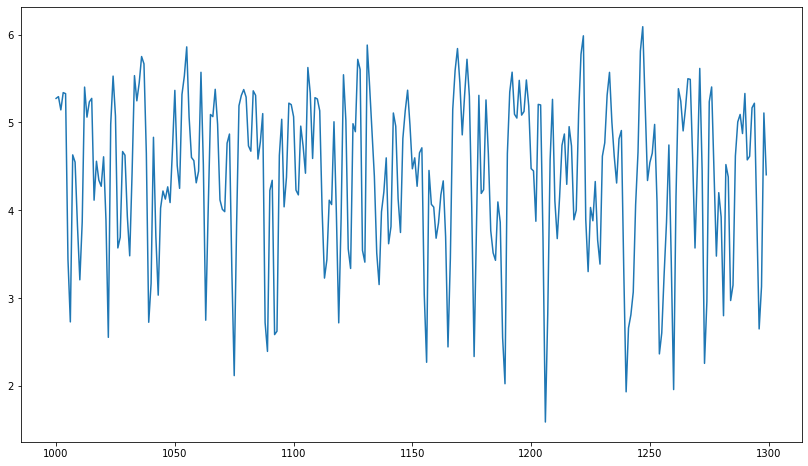

In [70]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1000, 1300), sim[1000:1300])
plt.show()

In [71]:
TT = ppress_dfs[0]['norm']

In [104]:
import DAMP_V2
reload(DAMP_V2)
from DAMP_V2 import DAMP_V2

In [105]:
damp = DAMP_V2({"lookahead": 100, "enable_output": True})

In [106]:
scor, pos, left_MP = damp.DAMP_2_0(TT, 20, 100)

-----------------------------------------------
Thank you for using DAMP.
This is version 2.0 of DAMP, please email Eamonn Keogh (eamonn@cs.ucr.edu) or Yue Lu (ylu175@ucr.edu) to make sure you have the latest version.
This time series is of length 2888, and the subsequence length is 20
The lookahead modified from 100 to the next power of 2: 128.
Hints:
Usually, the subsequence length you should use is between about 50 to 90% of a typical period.
A good initial value of lookahead is about 2^nearest_power_of_two(16 times S).
The range of lookahead should be 0 to length(T)-location_to_start_processing.
If speed is important, you can tune lookahead to get greater speed-up in your domain.
A simple search, doubling and halving the current value,
 should let you quickly converge on a good value.
------------------------------------------


Results:
DAMP_V2 run time 0:00:34.483878
Pruning Rate: 0.7338389310220296
Predicted discord score/position: 4.825567762541175 / [161]


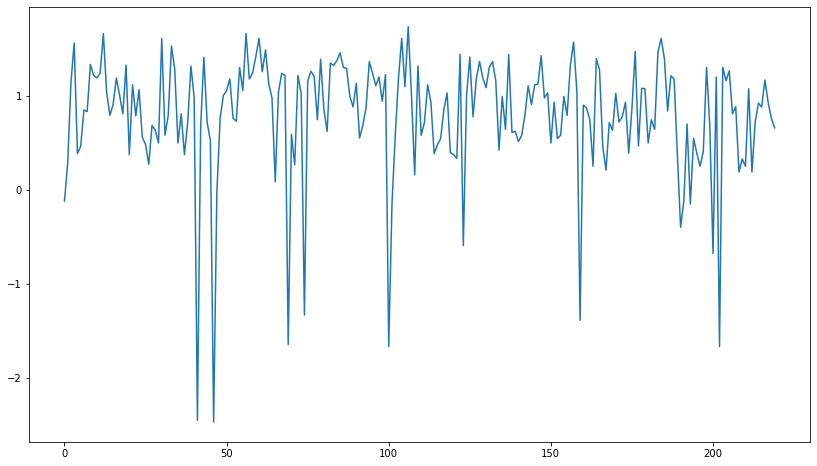

In [108]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(0, 220), TT[:220])
plt.show()

In [109]:
len(left_MP)

2888

In [110]:
max(left_MP)

4.825567862541175

In [111]:
max_mp = np.where(left_MP == max(left_MP))
print(max_mp[0])

[161]


In [112]:
left_MP[161]

4.825567862541175

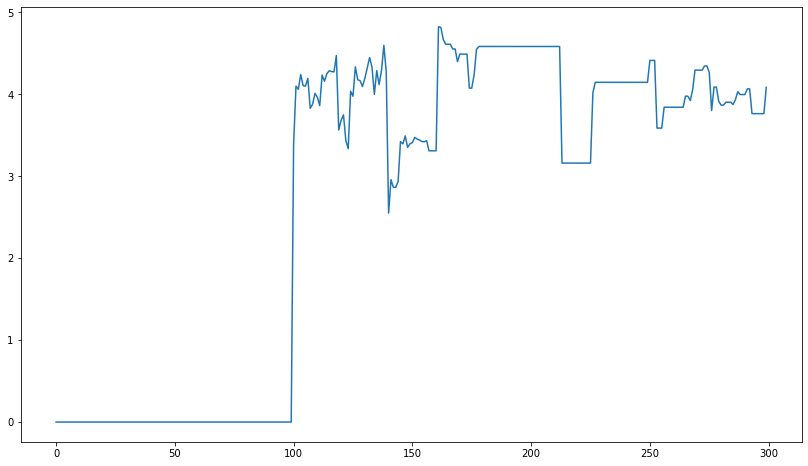

In [114]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(0, 300), left_MP[:300])
plt.show()

In [115]:
maxa = np.where(left_MP > 4.6)
print(maxa)

(array([ 161,  162,  163,  164,  165,  166,  764, 1117, 1118, 2518],
      dtype=int64),)


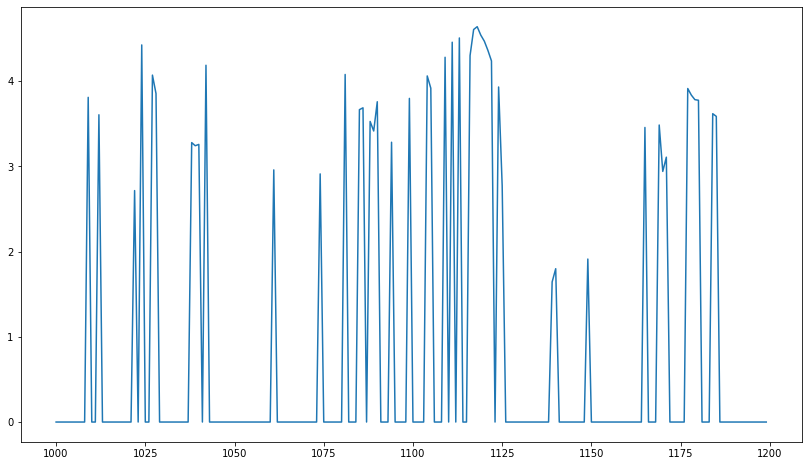

In [118]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1000, 1200), left_MP[1000:1200])
plt.show()

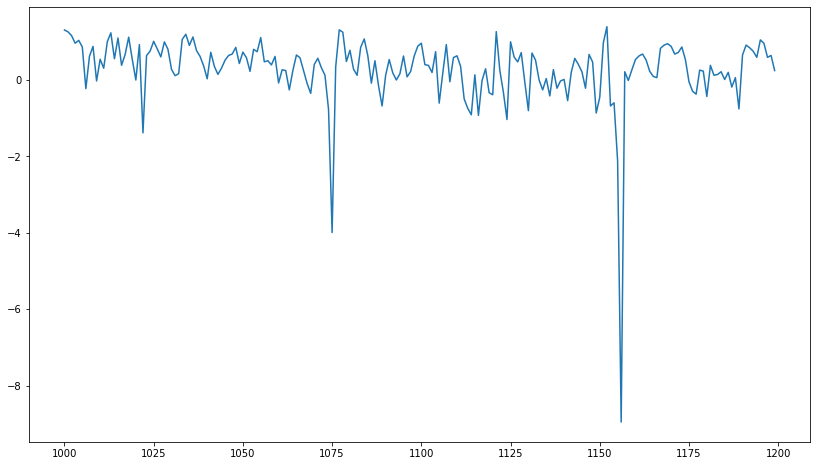

In [119]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1000, 1200), TT[1000:1200])
plt.show()

In [157]:
rng = pd.date_range('1/1/2023 00:00:00', periods=122, freq='1s')

In [158]:
rng

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:00:01',
               '2023-01-01 00:00:02', '2023-01-01 00:00:03',
               '2023-01-01 00:00:04', '2023-01-01 00:00:05',
               '2023-01-01 00:00:06', '2023-01-01 00:00:07',
               '2023-01-01 00:00:08', '2023-01-01 00:00:09',
               ...
               '2023-01-01 00:01:52', '2023-01-01 00:01:53',
               '2023-01-01 00:01:54', '2023-01-01 00:01:55',
               '2023-01-01 00:01:56', '2023-01-01 00:01:57',
               '2023-01-01 00:01:58', '2023-01-01 00:01:59',
               '2023-01-01 00:02:00', '2023-01-01 00:02:01'],
              dtype='datetime64[ns]', length=122, freq='S')

In [159]:
rng.floor('1min')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               ...
               '2023-01-01 00:01:00', '2023-01-01 00:01:00',
               '2023-01-01 00:01:00', '2023-01-01 00:01:00',
               '2023-01-01 00:01:00', '2023-01-01 00:01:00',
               '2023-01-01 00:01:00', '2023-01-01 00:01:00',
               '2023-01-01 00:02:00', '2023-01-01 00:02:00'],
              dtype='datetime64[ns]', length=122, freq=None)